In [1]:
!pip install xgboost

In [2]:
# model 套件
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Second Preprocessing

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler

In [4]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [5]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('Input_C_058.csv')
df1 = pd.read_csv('Input_C_057.csv')
df2 = pd.read_csv('Input_C_050.csv')

In [7]:
title = ['Input_C_054','Input_C_052','Input_C_055','Input_C_135','Input_C_056','Input_C_059',
         'Input_C_060']

"""
         ,'Input_A4_011','Input_A1_011','Input_A2_011','Input_C_053','Input_A3_011',
         'Input_A5_011','Input_A2_012','Input_A6_012','Input_C_051','Input_A1_012','Input_A5_012',
         'Input_A3_012','Input_A4_012']
"""

X = df[title].to_numpy()

y = df['Predict']

In [8]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

# model selecting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regresssion

In [10]:
import math

In [11]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [12]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

In [13]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [14]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000004


In [15]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.002012


In [16]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.8735


In [17]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,y_train))

Linear regression score: 0.8985


In [18]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 28.89


In [19]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 5))

Number lower than error: 22


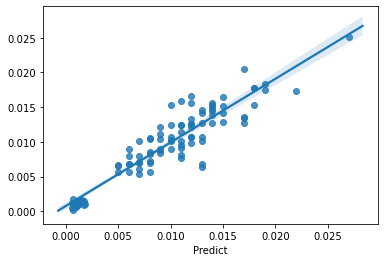

In [20]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [21]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(1.4806993975391975, 0.0007604763862054008)

In [22]:
# 對數化(平滑化)，將訓練資料丟進去模型訓練，看是要開根號或是取對數(這邊根號貌似較 better)
regr.fit(X_train,np.sqrt(y_train))

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,np.sqrt(y_train)))

Linear regression score: 0.9333


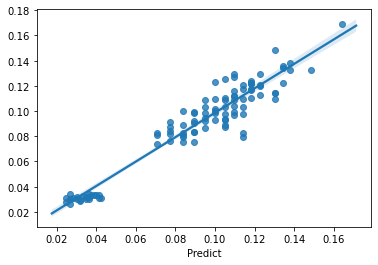

In [23]:
sb.regplot(np.sqrt(y_test), y_pred)

In [24]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, pow(y_pred,2)))

Percentage mse score: 23.29


In [25]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 5))

Number lower than error: 22


# XGBoost regression

In [26]:
from xgboost.sklearn import XGBRegressor, XGBRFRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
# XGBoost
xgb = XGBRegressor(booster = 'gblinear')

xgb.fit(X_train, np.sqrt(y_train))

y_pred = xgb.predict(X_test)

In [28]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.8611


In [29]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 24.09


In [30]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 5))

Number lower than error: 19


In [31]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % xgb.score(X_train,np.sqrt(y_train)))

XGBoost regression score: 0.9326


In [32]:
#  XGBoost Random Forest regressor
xgbrf = XGBRFRegressor(booster = 'gblinear')

xgbrf.fit(X_train, np.sqrt(y_train))

y_pred = xgb.predict(X_test)

[12:38:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bynode, num_parallel_tree, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [33]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.8611


In [34]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 24.09


In [35]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 5))

Number lower than error: 19


# RidgeCV

In [36]:
ridge = RidgeCV(alphas = [0.01, 0.1, 1, 10, 20, 30, 40], scoring="neg_mean_squared_error")
ridge.fit(X_train, np.sqrt(y_train))
alpha = ridge.alpha_
print("first best alpha", alpha)
ridge = RidgeCV(alphas = [0.4, 0.8, 1, 4])
ridge.fit(X_train, np.sqrt(y_train))
alpha = ridge.alpha_
print("second best alpha", alpha)
ridge = RidgeCV(alphas = [i/10 for i in range(1, 20)])
ridge.fit(X_train, np.sqrt(y_train))
alpha = ridge.alpha_
print("final best alpha", alpha)

first best alpha 1.0
second best alpha 1.0
final best alpha 1.2


In [37]:
y_pred = ridge.predict(X_test)

In [38]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.8681


In [39]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 23.03


In [40]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 5))

Number lower than error: 22


# LassoCV

In [41]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30], normalize=True)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006], normalize=True)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], normalize=True)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


C:\Users\Rubio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Rubio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Rubio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
y_pred = lasso.predict(X_test)

In [43]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.8718


In [44]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 25.65


In [45]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 5))

Number lower than error: 27


In [46]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 